In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from sklearn.ensemble import AdaBoostClassifier
from matplotlib.colors import ListedColormap
from IPython.display import Image 
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus
from sklearn.metrics import mean_squared_error
import pickle
import seaborn as sns; sns.set(style ='white', color_codes = True)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [4]:
college_nba = pd.read_csv('stats/college_noname.csv', index_col = 0)

In [5]:
features = college_nba.drop(['drafted'], axis = 1)

## Feature Importance

In [6]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [7]:
def plot_feature_importance(model, x_train, n=27):
    # extract and sort the feature importance
    features = model.feature_importances_
    feature_names = x_train.columns.values
    
    # combine the features importance and column names into a matrix and sort them
    feature_matrix = np.array([features, feature_names])
    feature_matrix = feature_matrix.transpose()
    feature_matrix.sort(0)
    
    # divide the column names and feature importance
    sorted_feat = feature_matrix[:, 0]
    sorted_columns = feature_matrix[:, 1]
    
     # plot the features
    plt.figure(figsize=(16, 12))
    try:
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center', color = 'Purple')
    
    except:
        # if n features is greater than the amount that actually exists
        n = len(sorted_feat)
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center')
        
    plt.yticks(sorted_columns[-n:], sorted_columns[-n:])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    return

### Confusion Matrix Function Plot

In [8]:
labels = ['Drafted', 'Not Drafted']
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Purples):
    
    # Compute confusion matrix
    cmat = pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True)
    print(cmat)
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


### ADABOOST CLASSIFIER

In [9]:
## adaboost
ada_clf = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth = 5))

In [10]:
# Feautures and Predicted
y = college_nba['drafted']

X  = features

In [11]:
#train_test_littttttt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

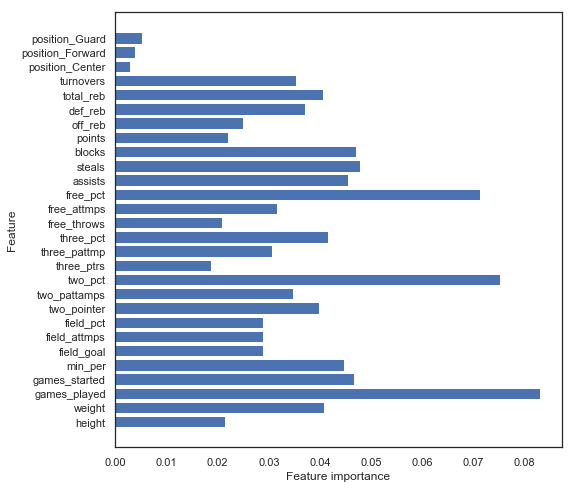

In [13]:
plot_feature_importances(ada_clf.fit(X_train, y_train))

### Cross Validation

In [9]:
ada_cv_score = cross_val_score(ada_clf, X_train, y_train, cv=3)
mean_ada_cv_score = np.mean(ada_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_ada_cv_score * 100))

Mean Cross Validation Score: 81.9%


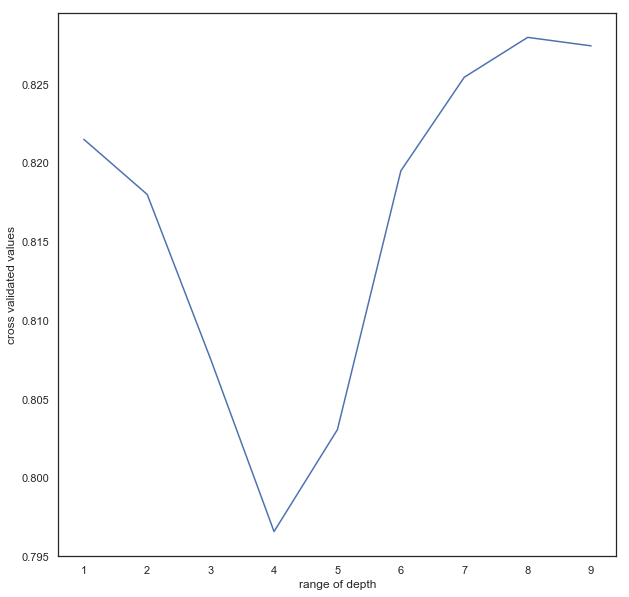

In [10]:
score = cross_val_score(ada_clf, X_train, y_train, cv = 10)
score.mean()
depth_range = range(1,10)
val = []
for depth in depth_range:
    ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = depth))
    depth_score = cross_val_score(ada_clf, X_train, y_train, cv = 10)
    val.append(depth_score.mean())
# print(val)
plt.figure(figsize = (10,10))
plt.plot(depth_range, val)
plt.xlabel('range of depth')
plt.ylabel('cross validated values')
plt.show()

### Model Testing

In [46]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=9,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [47]:
test_preds = ada_clf.predict(X_test)

In [48]:
#how well did our model predict our correct class? 
accuracy_score(y_test, ada_test_preds)

0.8102926337033299

In [50]:
# dot_data = StringIO()
# export_graphviz(ada_clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [51]:
def print_metrics(labels, preds):
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, ada_test_preds)
print(f'\n{classification_report(y_test, ada_test_preds)}')

Accuracy Score: 0.8102926337033299
Precision Score: 0.7508090614886731
Recall Score: 0.6763848396501457
F1 Score: 0.7116564417177914

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       648
           1       0.75      0.68      0.71       343

    accuracy                           0.81       991
   macro avg       0.79      0.78      0.79       991
weighted avg       0.81      0.81      0.81       991



Predicted    0    1  All
True                    
0          571   77  648
1          111  232  343
All        682  309  991


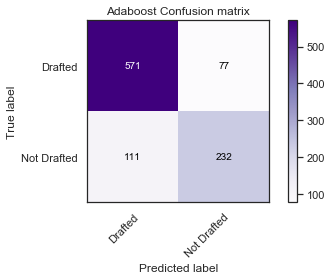

In [28]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, ada_test_preds, classes=labels,
                      title='Adaboost Confusion matrix')

plt.show()

# print(confusion_matrix(y_test, test_preds, labels=None, sample_weight=None))

##  Standard Scalar AdaBoost

In [52]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  


model_ada = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth = 5))
model_ada.fit(X_train_scaled, y_train)

test_pred_scaled_ada = model_ada.predict(X_test_scaled)

In [54]:
def print_metrics(labels, preds):
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_pred_scaled_ada)
# print(confusion_matrix(y_test, test_pred_scaled, labels=None, sample_weight=None))
print(f'\n{classification_report(y_test, test_pred_scaled_ada)}')

Accuracy Score: 0.7790110998990918
Precision Score: 0.7080536912751678
Recall Score: 0.6151603498542274
F1 Score: 0.6583463338533542

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       648
           1       0.71      0.62      0.66       343

    accuracy                           0.78       991
   macro avg       0.76      0.74      0.75       991
weighted avg       0.77      0.78      0.77       991



### Scaled Adaboost Confusion Matrix

Predicted    0    1  All
True                    
0          571   77  648
1          111  232  343
All        682  309  991


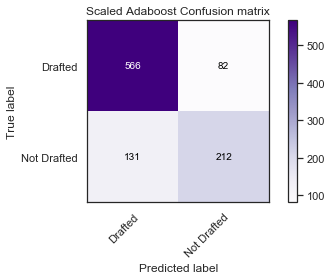

In [29]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_pred_scaled_ada, classes=labels,
                      title='Scaled Adaboost Confusion matrix')

plt.show()

### DT ADABOOST Grid Search 

In [24]:
dt_grid_param_ada = {'n_estimators': [50, 100, 250],
                     'learning_rate': [1.0, 0.5, 0.1]
                    }

dt_grid_search_ada = GridSearchCV(ada_clf, dt_grid_param_ada, verbose=1, cv=3, n_jobs=-1)

dt_gs_results_ada = dt_grid_search_ada.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   37.5s finished


In [25]:
#Predict values based on new parameters
y_pred_acc = dt_grid_search_ada.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))
print("Best Parameter Found:")
print(dt_grid_search_ada.best_params_)
print("\nBest Estimator Found:")
print(dt_grid_search_ada.best_estimator_)
print("Best Score Found:")
print(dt_grid_search_ada.best_score_)

Accuracy Score : 0.8163471241170535
Precision Score : 0.7728813559322034
Recall Score : 0.6647230320699709
F1 Score : 0.7147335423197492
Best Parameter Found:
{'learning_rate': 1.0, 'n_estimators': 250}

Best Estimator Found:
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=9,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                      

### Adaboost Grid Search Confusion Matrix

Predicted    0    1  All
True                    
0          571   77  648
1          111  232  343
All        682  309  991


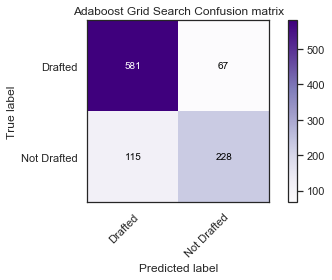

In [30]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_acc, classes=labels,
                      title='Adaboost Grid Search Confusion matrix')

plt.show()

# #Logistic Regression (Grid Search) Confusion matrix
# confusion_matrix(y_test,y_pred_acc)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes= 16, n_jobs=-1)

In [ ]:
rnd_clf.fit(X_train, y_train)

In [ ]:
y_pred_rf = rnd_clf.predict(X_test)